# Visualization recap - Exercise in Python
## Mikołaj Malec
### 2023-03-09

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("~/Desktop/winequality_all.csv", skiprows=5)

df[:10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,3,red
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,5,red
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,5,red
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,3,red
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,3,red


### Investigating the distribution of alcohol variable

Histograms and distribution lines are great ways to show how data is distributed. It gives the sense of trend and where is a high density of points.

Another visualization can be a box plot but for one dimension it's too simple (shows very little information compared with a histogram or distribution line. Unless we want to show the most important qualities.

For more information, vertical lines for median, average, or quantities can be added, but it can be too much information.

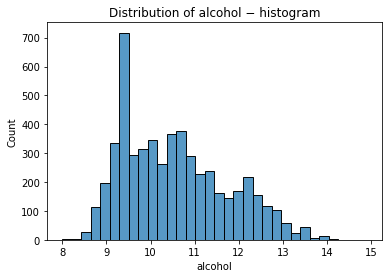

In [37]:
sns.histplot(df["alcohol"]).set(
    title='Distribution of alcohol − histogram')
plt.show()

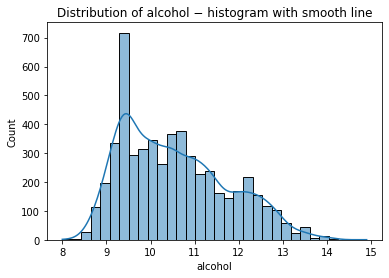

In [36]:
sns.histplot(df["alcohol"], kde=True).set(
    title='Distribution of alcohol − histogram with smooth line')
plt.show()

### Comparing the distribution of alcohol variable between two types of wine i.e. red and white

Histograms and distribution lines can also be used to compare the distribution of a couple of categories. They should be used if we want to compare trends, places of high density, and compare counts.

For any number of categories (even dozens), boxplots can be used, and they are easy to compare. They should be used if we want to compare qualities (average, Q1, Q3) and scattering of data.

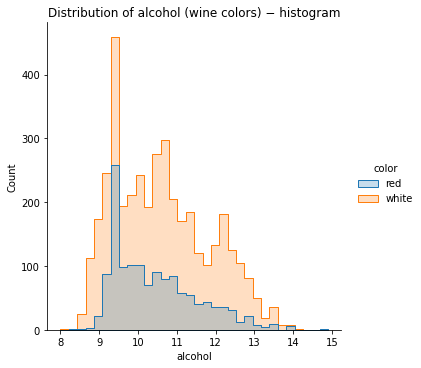

In [35]:
sns.displot(df, x="alcohol", hue="color", element="step").set(
    title='Distribution of alcohol (wine colors) − histogram')
plt.show()

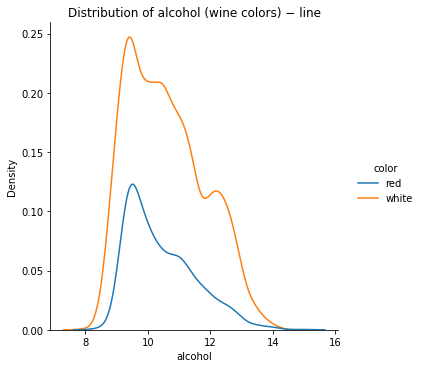

In [34]:
sns.displot(df, x="alcohol", hue="color", kind="kde").set(
    title='Distribution of alcohol (wine colors) − line')
plt.show()

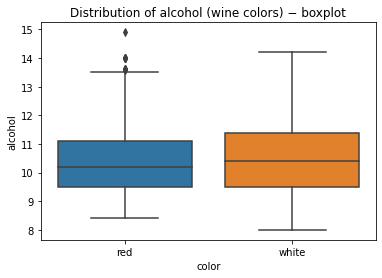

In [33]:
sns.boxplot( data = df, y="alcohol", x="color").set(
    title='Distribution of alcohol (wine colors) − boxplot')
plt.show()

### Comparing the distribution of alcohol variable in each of possible quality group defined by response variable

As noted in the previous point, boxplots should be used, as they are easy to compare and are suitable for any number of categories. Also, the plots can be sorted by category hierarchy (if such exists), so the trend can be shown.

Histograms and distribution lines shouldn't be used, as multiple categories would make the plot hard to read and information would be hard to see.

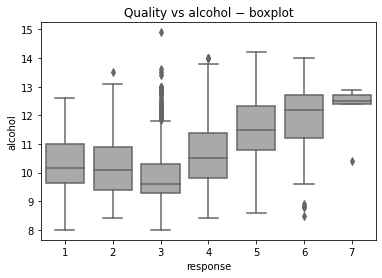

In [32]:
sns.boxplot( data = df, y="alcohol", x="response", color="darkgrey").set(
    title='Quality vs alcohol − boxplot')
plt.show()

### Percentage of red and white wines within each quality group

Best way to show the percentage is a normalized bar chart. It can show comparisons between categories for specific groups. If there are not that many categories (two are best), a bar chart can be stacked, to show the reader that it's a percentage, not a quantity comparison. For multiple categories, categories in stacked bar charts can be hard to compare. 

As a rule of thumb, normal bar charts are used to compare specific categories and the stacked bar chart is used to compare sets of categories.

Another chart to show percentages is a pie chart, but it should be used only to compare in one group, as comparisons between multiple piecharts are hard.

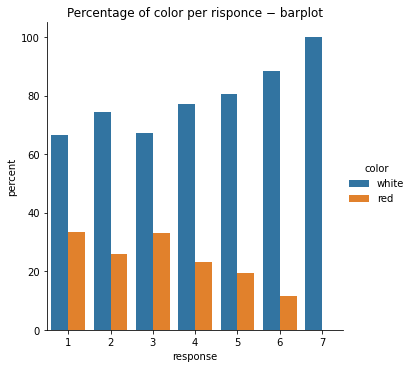

In [31]:
df1 = df.groupby("response")["color"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename("percent").reset_index()

sns.catplot( data=df1, x="response", y="percent", hue="color", kind='bar').set(
    title='Percentage of color per risponce − barplot')
plt.show()

### Investigating the relationship between variables describing acidity of the wines

A good way to explore/show relationships between categories is pair plots. There is an advanced implementation of It in R and Python, which shows a matrix of plots for every combination of variable pairs. Comparisons between two continuous variables are shown on a scatter plot.

For augmentation, the correlation can be calculated or the trend line can be added.

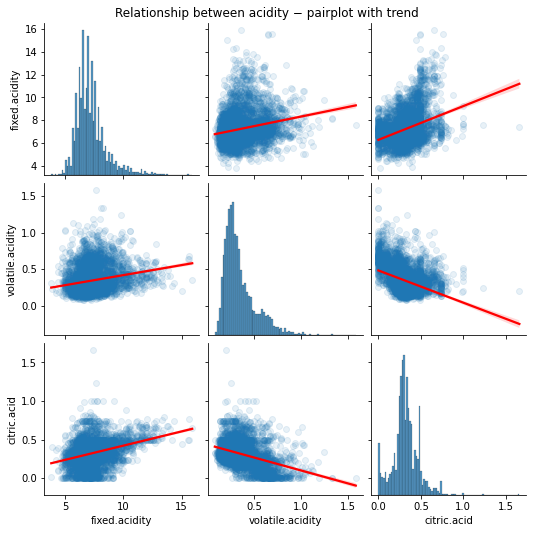

In [30]:
pp = sns.pairplot(df[["fixed.acidity","volatile.acidity","citric.acid"]],
                  #trend lines and add alpha
                  kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#add space for title
pp.fig.subplots_adjust(top=.95)
pp.fig.suptitle('Relationship between acidity − pairplot with trend')
plt.show()